In [3]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scikitplot import classifier_factory

In [4]:
labels = pd.read_csv('./labels.csv', index_col=0)
pts = pd.read_csv('./pts.csv', index_col=0)

In [3]:
pts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871535 entries, 0 to 871534
Data columns (total 83 columns):
system_id                               871535 non-null int64
HPL_Tflops                              871535 non-null float64
StarDGEMM_Gflops                        871535 non-null float64
SingleDGEMM_Gflops                      871535 non-null float64
PTRANS_GBs                              871535 non-null float64
MPIRandomAccess_LCG_GUPs                871535 non-null float64
MPIRandomAccess_GUPs                    871535 non-null float64
StarRandomAccess_LCG_GUPs               871535 non-null float64
SingleRandomAccess_LCG_GUPs             871535 non-null float64
StarRandomAccess_GUPs                   871535 non-null float64
SingleRandomAccess_GUPs                 871535 non-null float64
StarSTREAM_Copy                         871535 non-null float64
StarSTREAM_Scale                        871535 non-null float64
StarSTREAM_Add                          871535 non-null flo

In [5]:
all_data = pts.drop([
'matrix_id',
'system_id',
'time',
'matrix_id',
'status_id'], axis=1)

In [ ]:
# plain_data = pts.drop([
# 'matrix_id', 
# 'status_id', 
# 'time', 
# 'HPL_Tflops',        
# 'StarDGEMM_Gflops',                        
# 'SingleDGEMM_Gflops',                      
# 'PTRANS_GBs',                              
# 'MPIRandomAccess_LCG_GUPs',                
# 'MPIRandomAccess_GUPs',                    
# 'StarRandomAccess_LCG_GUPs',               
# 'SingleRandomAccess_LCG_GUPs',             
# 'StarRandomAccess_GUPs',                   
# 'SingleRandomAccess_GUPs',                 
# 'StarSTREAM_Copy',                         
# 'StarSTREAM_Scale',                        
# 'StarSTREAM_Add',                          
# 'StarSTREAM_Triad',                        
# 'SingleSTREAM_Copy',                       
# 'SingleSTREAM_Scale',                      
# 'SingleSTREAM_Add',                        
# 'SingleSTREAM_Triad',                      
# 'StarFFT_Gflops',                          
# 'SingleFFT_Gflops',                        
# 'MPIFFT_Gflops',                           
# 'MaxPingPongLatency_usec',                 
# 'RandomlyOrderedRingLatency_usec',         
# 'MinPingPongBandwidth_GBytes',             
# 'NaturallyOrderedRingBandwidth_GBytes',    
# 'RandomlyOrderedRingBandwidth_GBytes',     
# 'MinPingPongLatency_usec',                 
# 'AvgPingPongLatency_usec',                 
# 'MaxPingPongBandwidth_GBytes',             
# 'AvgPingPongBandwidth_GBytes',             
# 'NaturallyOrderedRingLatency_usec',        
# 'MemProc',                                
# 'core_count',                              
# 'cpu_freq',                                
# 'bogo_mips',                              
# 'l1_cache',                                
# 'l2_cache',                                
# 'l3_cache',                                
# 'memory_size',                             
# 'memory_freq',                             
# 'memory_type'], axis=1)

In [ ]:
all_data.info()

In [ ]:
summit_only_data = plain_data[plain_data['system_id'] == 3]
summit_only_labels = labels[plain_data['system_id'] == 3]

In [ ]:
summit_only_data.info()
summit_only_labels.info()

In [6]:
X = all_data.as_matrix()
y = labels.as_matrix()

In [ ]:
y = y[:,0]
y.transpose()

In [7]:
from sklearn.externals import joblib
classifier = RandomForestClassifier()
classifier = classifier.fit(X,y)
joblib.dump(classifier, 'all_data_classifier.pkl')

['all_data_classifier.pkl']

In [10]:
y.shape

(871535, 18)

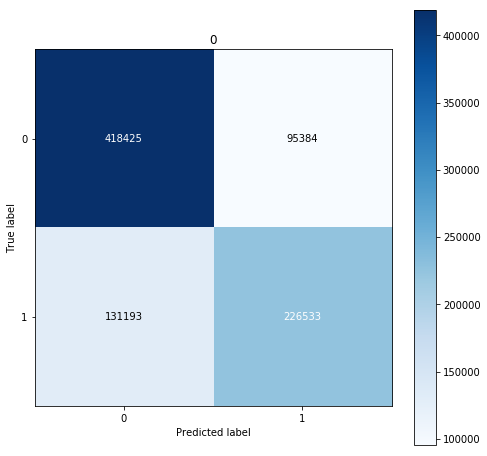

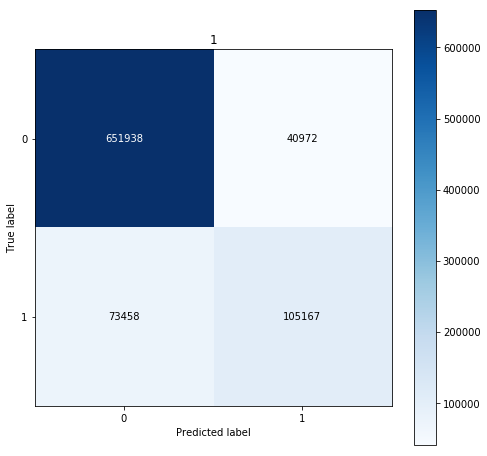

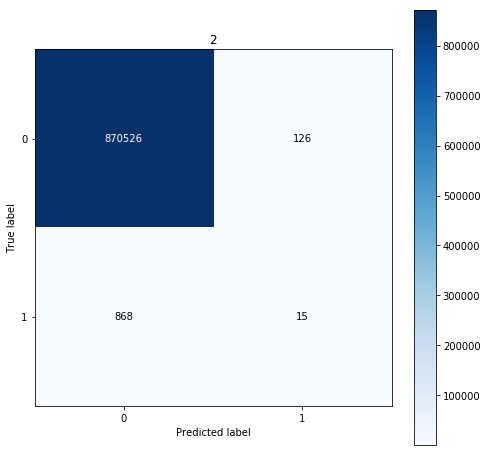

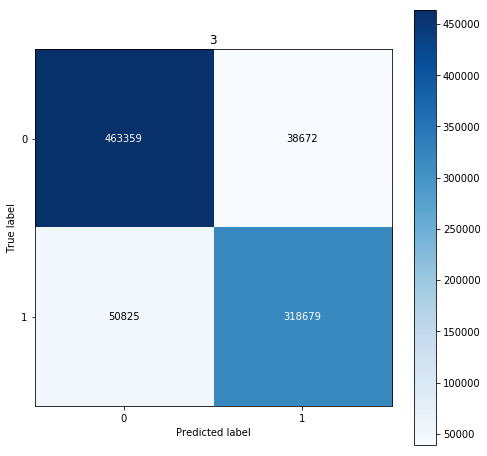

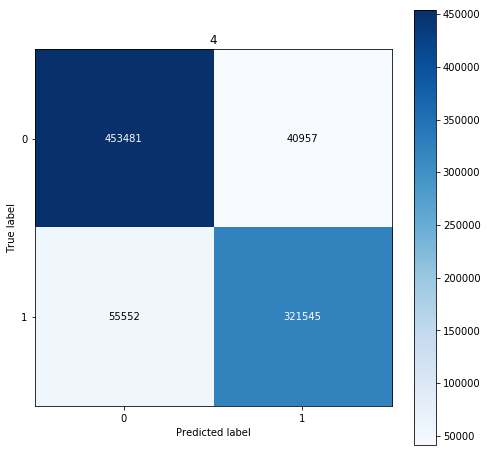

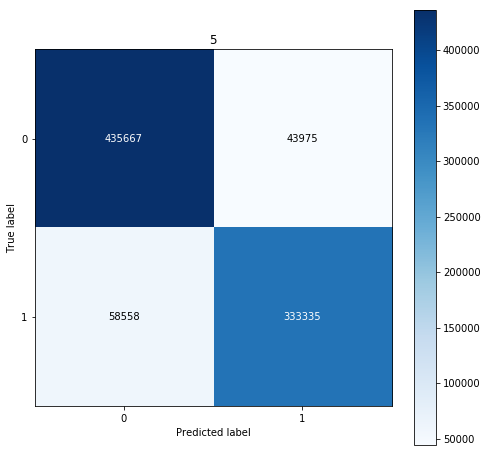

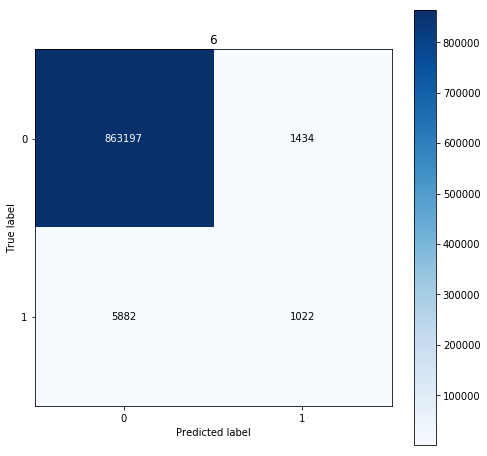

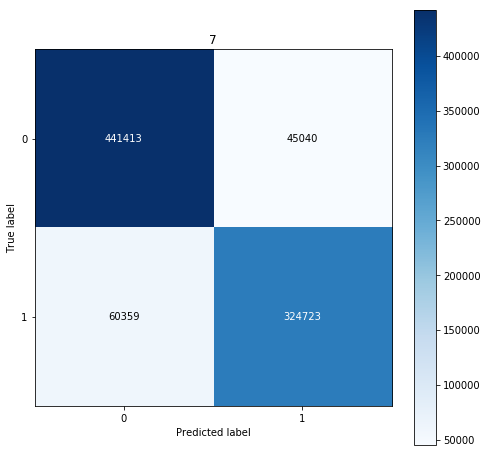

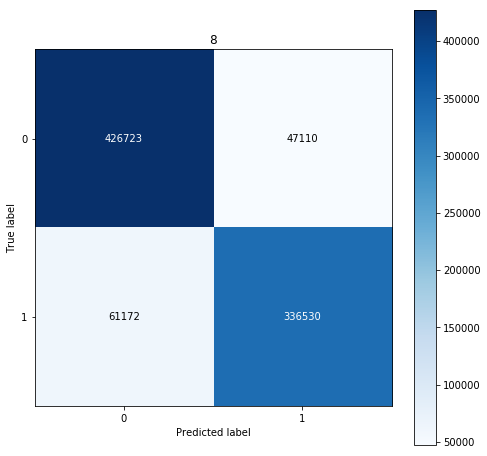

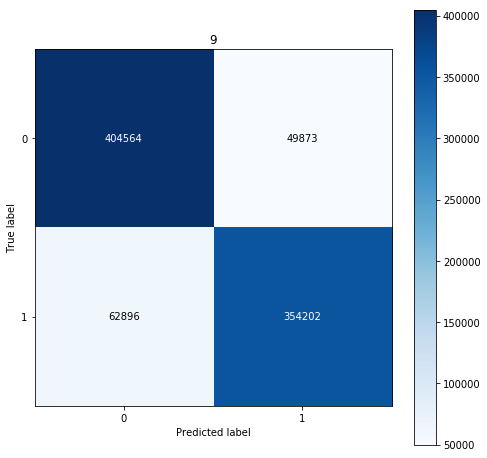

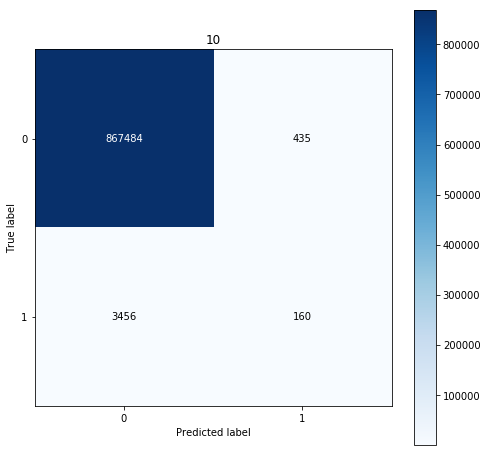

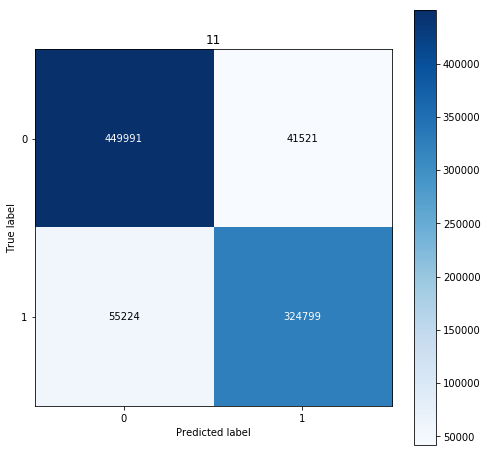

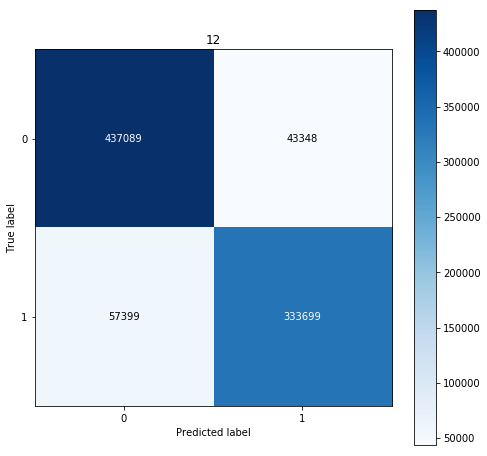

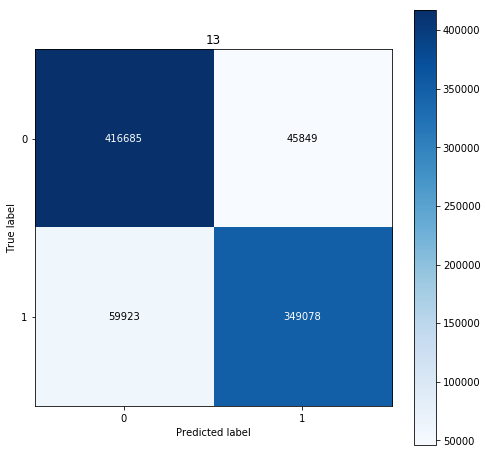

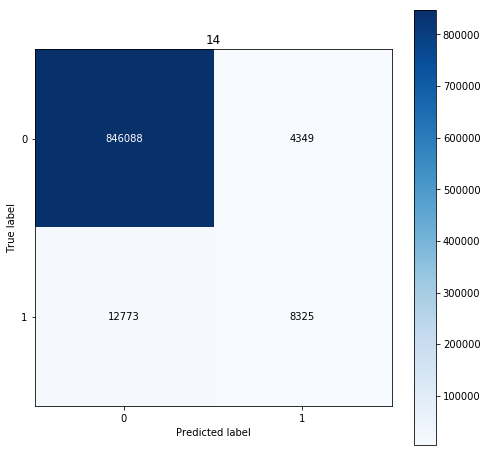

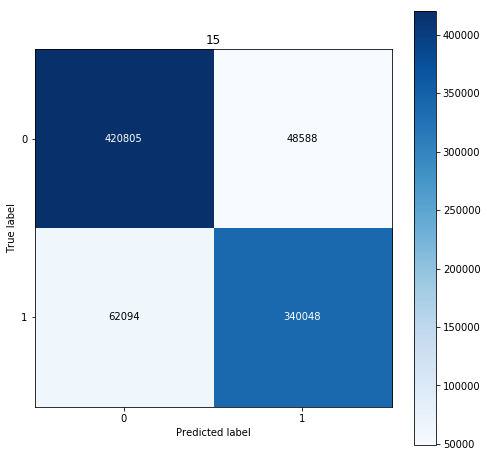

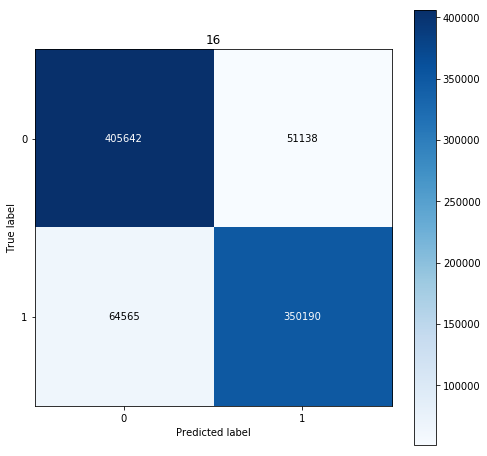

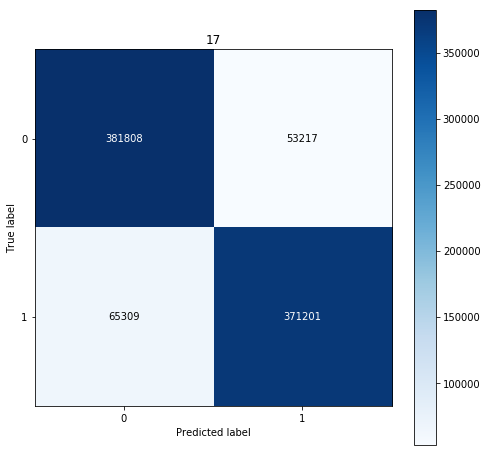

In [15]:
classifiers_list = []
for i in range(0,18):
    classifier = RandomForestClassifier()
    classifier.fit(X,y[:,i])
    #classifiers_list.append(classifier)
    classifier_factory(classifier)
    classifier.plot_confusion_matrix(X, y[:,i], 
                                 cv=10,
                                 title=str(i),
                                 shuffle=True,
                                    figsize=[8,8]
                                 )
    plt.show()
#joblib.dump(classifiers_list, 'individual_label_classifiers.pkl')

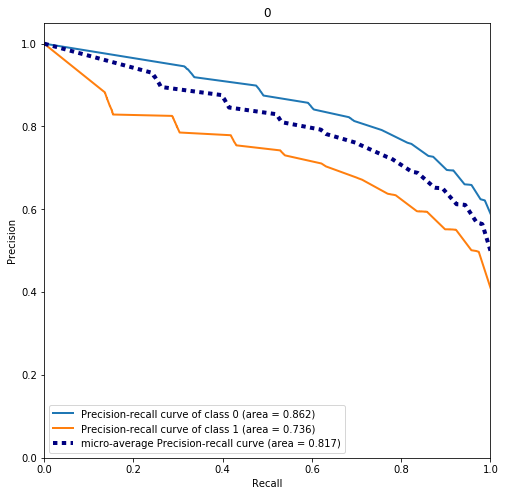

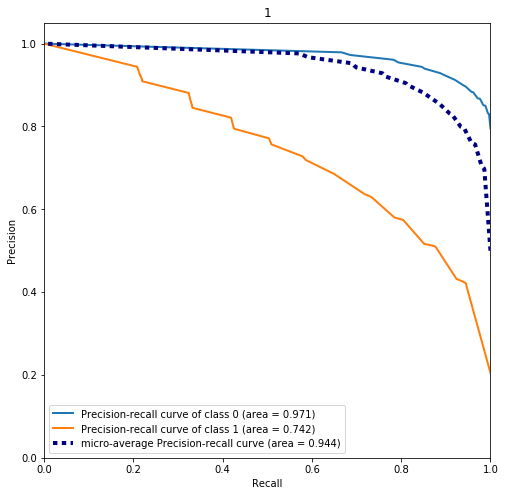

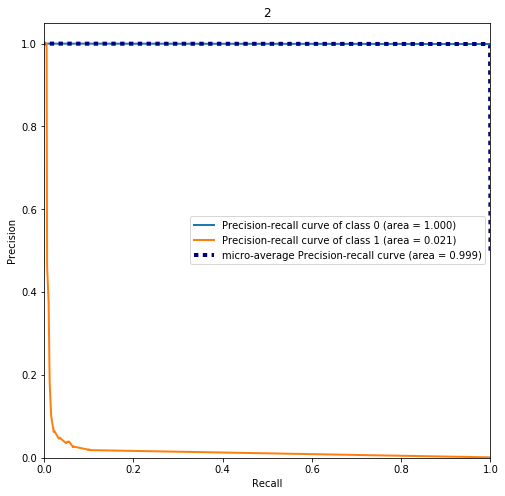

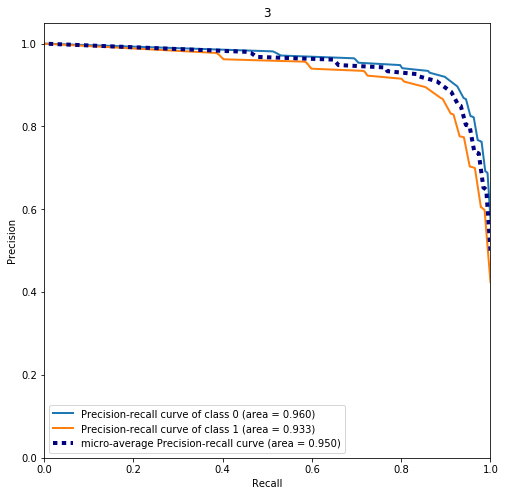

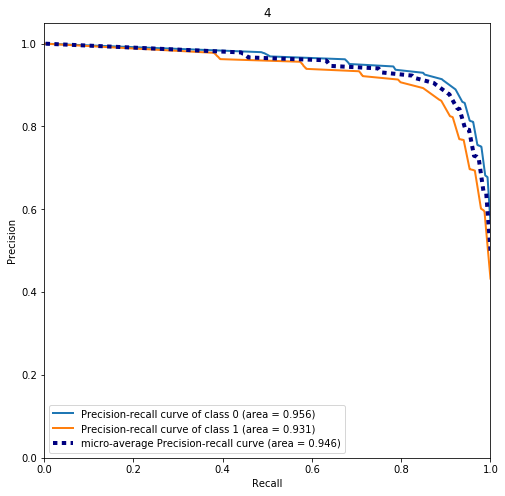

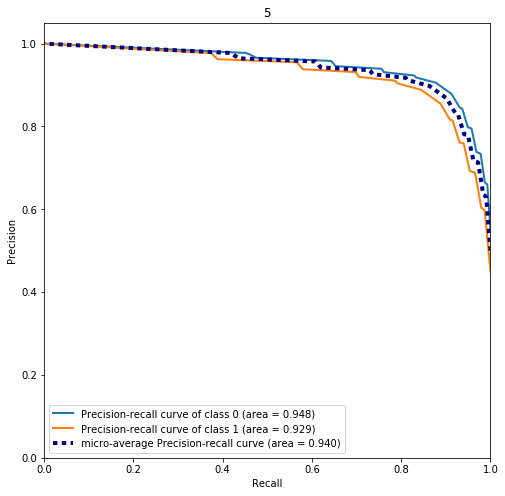

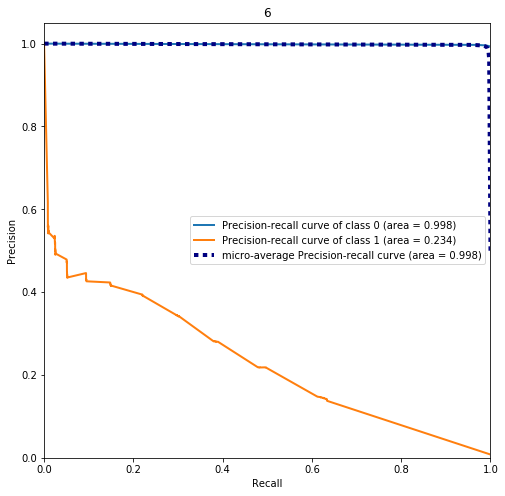

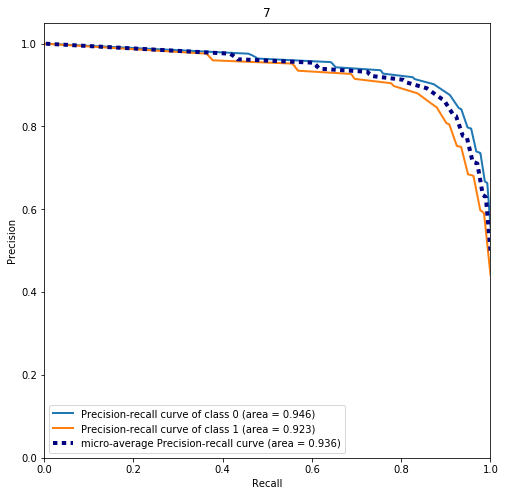

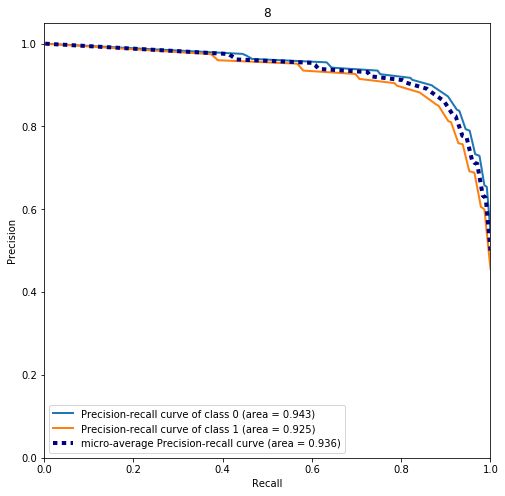

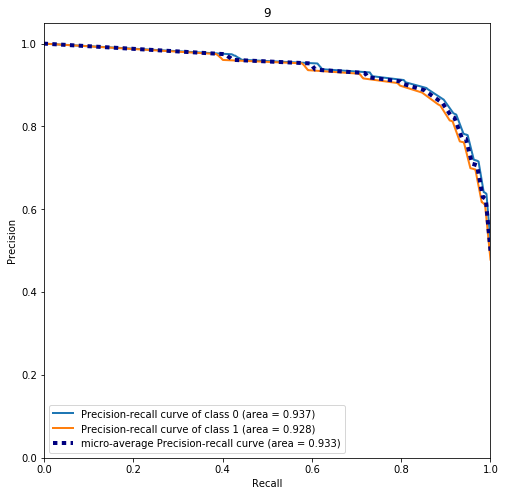

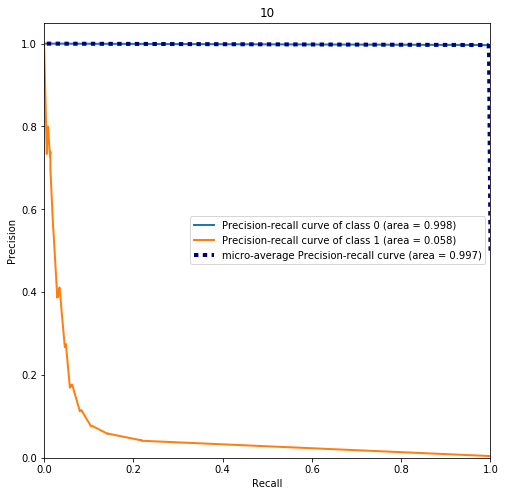

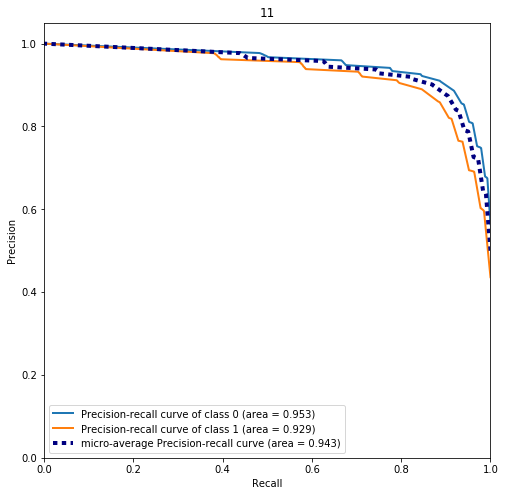

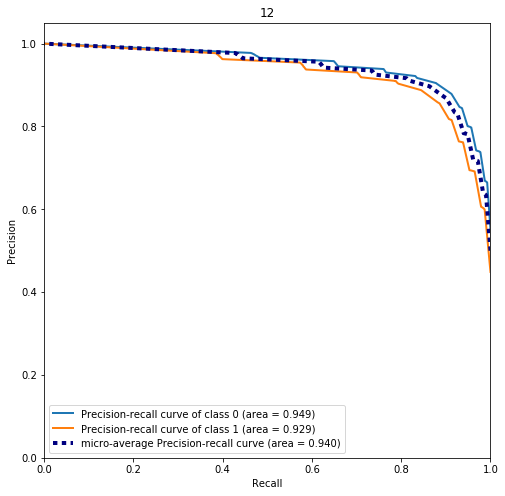

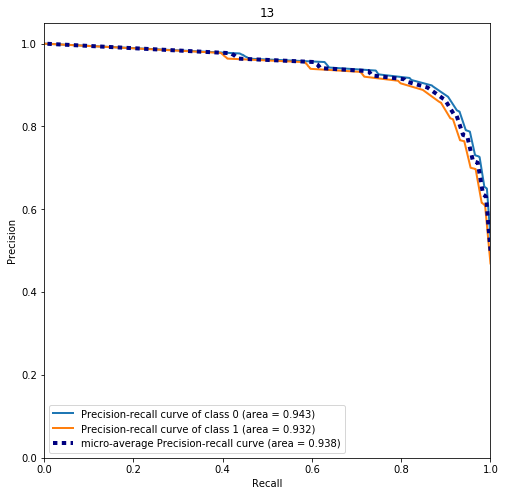

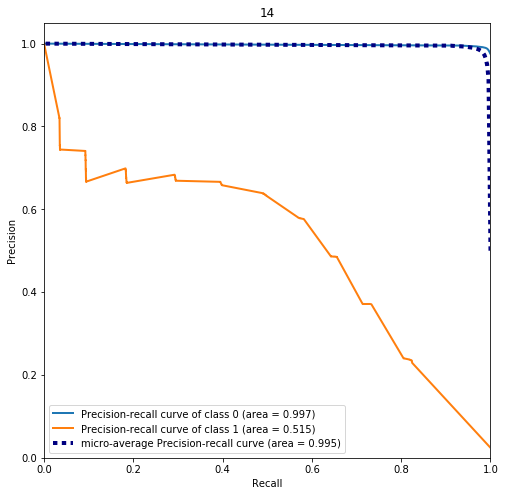

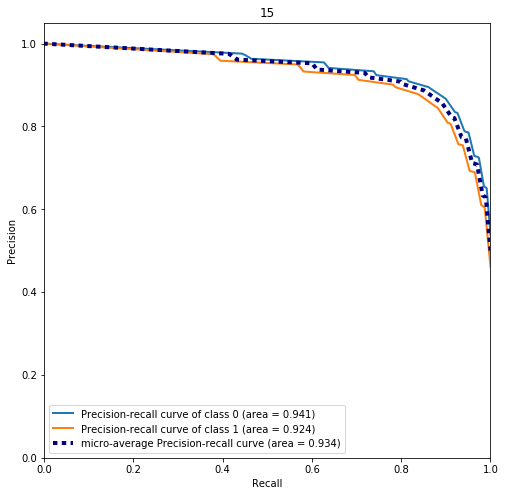

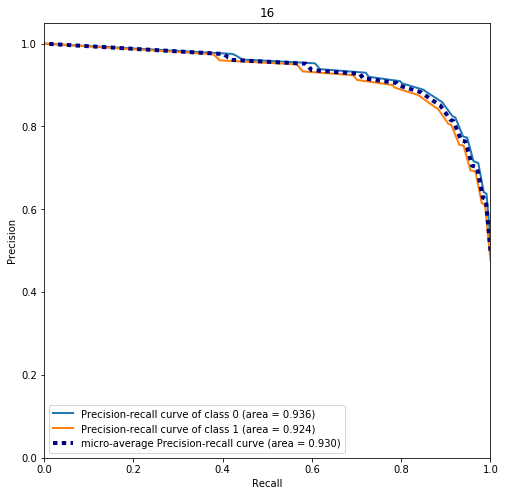

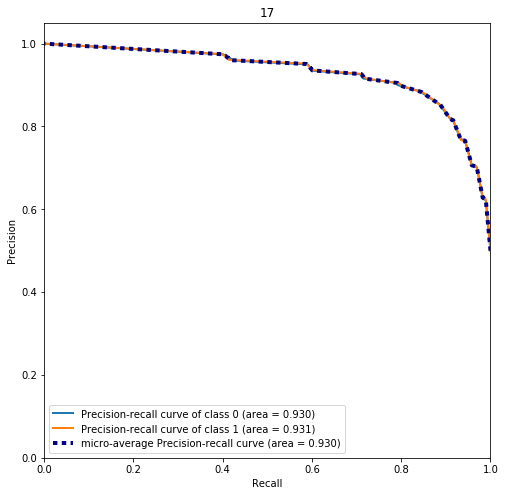

In [16]:
classifiers_list = []
for i in range(0,18):
    classifier = RandomForestClassifier()
    classifier.fit(X,y[:,i])
    #classifiers_list.append(classifier)
    classifier_factory(classifier)
    classifier.plot_precision_recall_curve(X, y[:,i], 
                                 cv=10,
                                 title=str(i),
                                 shuffle=True,
                                    figsize=[8,8]
                                 )
    plt.show()
#joblib.dump(classifiers_list, 'individual_label_classifiers.pkl')

In [17]:
classifiers_list = []
for i in range(0,18):
    classifier = RandomForestClassifier()
    classifier.fit(X,y[:,i])
    #classifiers_list.append(classifier)
    classifier_factory(classifier)
    classifier.plot_learning_curve(X, y[:,i], 
                                 cv=10,
                                 title=str(i),
                                 shuffle=True,
                                    figsize=[8,8]
                                 )
    plt.show()
#joblib.dump(classifiers_list, 'individual_label_classifiers.pkl')

TypeError: plot_learning_curve() got an unexpected keyword argument 'shuffle'

In [ ]:
classifiers_list = []
for i in range(0,18):
    classifier = RandomForestClassifier()
    classifier.fit(X,y[:,i])
    #classifiers_list.append(classifier)
    classifier_factory(classifier)
    classifier.plot_feature_importances(X, y[:,i], 
                                 cv=10,
                                 title=str(i),
                                 shuffle=True,
                                    figsize=[8,8]
                                 )
    plt.show()
#joblib.dump(classifiers_list, 'individual_label_classifiers.pkl')

In [ ]:
classifiers_list = []
for i in range(0,18):
    classifier = RandomForestClassifier()
    classifier.fit(X,y[:,i])
    #classifiers_list.append(classifier)
    classifier_factory(classifier)
    classifier.plot_ks_statistic(X, y[:,i], 
                                 cv=10,
                                 title=str(i),
                                 shuffle=True,
                                    figsize=[8,8]
                                 )
    plt.show()
#joblib.dump(classifiers_list, 'individual_label_classifiers.pkl')

In [7]:
classifiers_list = joblib.load('individual_label_classifiers.pkl')

In [11]:
for i in range (0,18):
    cur_y = y[:,i]
    pred_y = classifiers_list[i].pred
    #     classifiers_list[i].plot_confusion_matrix(X, y[:,i],
    #                                      cv=10,
    #                                      title=str(i),
    #                                      shuffle=True)
    plt.show()

/usr/local/lib/python3.5/dist-packages/scikitplot/classifiers.py:51: UserWarning: "plot_feature_importances" method already in clf. Overriding anyway. This may result in unintended behavior.
  'Overriding anyway. This may result in unintended behavior.'.format(key))
/usr/local/lib/python3.5/dist-packages/scikitplot/classifiers.py:51: UserWarning: "plot_confusion_matrix" method already in clf. Overriding anyway. This may result in unintended behavior.
  'Overriding anyway. This may result in unintended behavior.'.format(key))
/usr/local/lib/python3.5/dist-packages/scikitplot/classifiers.py:51: UserWarning: "plot_learning_curve" method already in clf. Overriding anyway. This may result in unintended behavior.
  'Overriding anyway. This may result in unintended behavior.'.format(key))
/usr/local/lib/python3.5/dist-packages/scikitplot/classifiers.py:51: UserWarning: "plot_precision_recall_curve" method already in clf. Overriding anyway. This may result in unintended behavior.
  'Overriding

KeyboardInterrupt: 

In [6]:
classifier.plot_precision_recall_curve(X,y[:,0],
                                       shuffle=True,
                                       cv=10,
                                       curves='each_class')
plt.show()

NameError: name 'classifier' is not defined

In [ ]:
classifier = RandomForestClassifier()
classifier_factory(classifier)
sss = StratifiedShuffleSplit()
y_preds = []
y_tests = []
i = 0
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    classifier.plot_roc_curve(X_test,y_test)
    plt.show()
    y_preds.append(classifier.predict(X_test))
    y_tests.append(y_test)
    i+=1

In [ ]:
j = i
for i in range(0,j):
    y_preds[i] = y_preds[i].astype(int)
y_preds

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
for i in range(0,10):
    print(classification_report(y_tests[i],y_preds[i]))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
for i in range(0,10):
    print(classification_report(y_tests[i],y_preds[i]))

In [ ]:
from sklearn.model_selection import KFold
classifier = RandomForestClassifier()
kf = KFold(n_splits=10)
y_preds = []
y_tests = []
i = 0
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    y_preds.append(classifier.predict(X_test))
    y_tests.append(y_test)
    i+=1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
for i in range(0,10):
    print(classification_report(y_tests[i],y_preds[i]))

In [ ]:
from sklearn.metrics import coverage_error, label_ranking_average_precision_score, label_ranking_loss
print(coverage_error(y_tests[0], y_preds[0]))
print(coverage_error(y_tests[1], y_preds[0]))
print(coverage_error(y_tests[0], y_preds[0]))

In [ ]:
y_pred = classifier.predict(X)
y_pred = y_pred.astype(int)
y_pred

In [ ]:
y_pred_prob = classifier.predict_proba(X)
y_pred_prob

In [ ]:
print("Predicted number of instances:\t",
sum(y_pred[:,0]),
sum(y_pred[:,1]),
sum(y_pred[:,2]),
sum(y_pred[:,3]),
sum(y_pred[:,4]),
sum(y_pred[:,5]))

print("Predicted probabilities of instances:\n",
sum(y_pred_prob[0]), '\n',
sum(y_pred_prob[1]),'\n',
sum(y_pred_prob[2]),'\n',
sum(y_pred_prob[3]),'\n',
sum(y_pred_prob[4]),'\n',
sum(y_pred_prob[5]))

print("Actual number of instances:\t",
sum(y[:,0]),
sum(y[:,1]),
sum(y[:,2]),
sum(y[:,3]),
sum(y[:,4]),
sum(y[:,5]))

In [ ]:
classifier.score(X,y)

In [ ]:
from sklearn.metrics import coverage_error, label_ranking_average_precision_score, label_ranking_loss
print(coverage_error(y, results_y))
print(label_ranking_average_precision_score(y, results_y))
print(label_ranking_loss(y, results_y))

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, fbeta_score
print(f1_score(y, y_pred, average=None))
print(f1_score(y, y_pred, average='micro'))
print(f1_score(y, y_pred, average='macro'))
print(f1_score(y, y_pred, average='samples'))
print(f1_score(y, y_pred, average='weighted'))
scores = fbeta_score(y, y_pred, beta=0.5, average=None)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y,y_pred))
print(confusion_matrix(y[:,0],y_pred[:,0]))

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
print(roc_auc_score(y, y_pred))

In [ ]:
from sklearn.metrics import zero_one_loss
print(zero_one_loss(y,y_pred)) # Fraction of misclassifications
print(zero_one_loss(y,y_pred,normalize=False)) # num of misclassifications